# Introduction 

In this notebook we will perform an exploratory data analysis (EDA). An EDA is used to find trends/patterns or correlations in a dataset that are useful on their own or can be used to inform modeling decisions. EDA involves both exploratory figures as well as summary statistics to quantify patterns. In short, we use EDA to find out what we can learn from our data.

## Dataset

We are using the diabetes dataset which is [available on Kaggle](https://www.kaggle.com/uciml/pima-indians-diabetes-database). The data was originally collected by the National Institute of Diabetes and Digestive and Kidney Diseases from a set of females at least 21 years old and of Pima Indian Heritage. 
__The objective is to use the patient information to predict whether or no the patient has diabetes.__
There are 8 features (explanatory variables) and 1 label (response variable). This data collected from acutal patients and represents a task which might commonly be undertaken by a human doctor interested in identifying the patients most at risk for diabetes in order to recommend preventative measures.

# Exploratory Data Analysis

In [10]:
# numpy and pandas for data manipulation
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore', category=UserWarning)

### Read in Data and Calculate Summary Statistics

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/WillKoehrsen/eecs-491/master/assign/project/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


There are 768 observations (patients) with 8 features and 1 label each. The minimum glucose, blood pressure, skin thickness, insulin, and BMI are all 0. This appears suspect because these are physical quantities that cannot be 0 (for a live person). Therefore, this has already told us that we will need to perform imputation on these five columns. The range of the other variables all appears reasonable. 

## Visualizations

We can start off with the Pairs Plot which plots all variables against one another pairwise. This is useful for finding correlations between variables and visualizing distributions. 

In [4]:
# matploblib and seaborn for visualizations
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_context('talk')

In this plot, we can color the distributions by the outcome to see if there are noticeable trends between the features and whether or not the patient has diabetes. First, we can show the plot without imputing the missing values. 

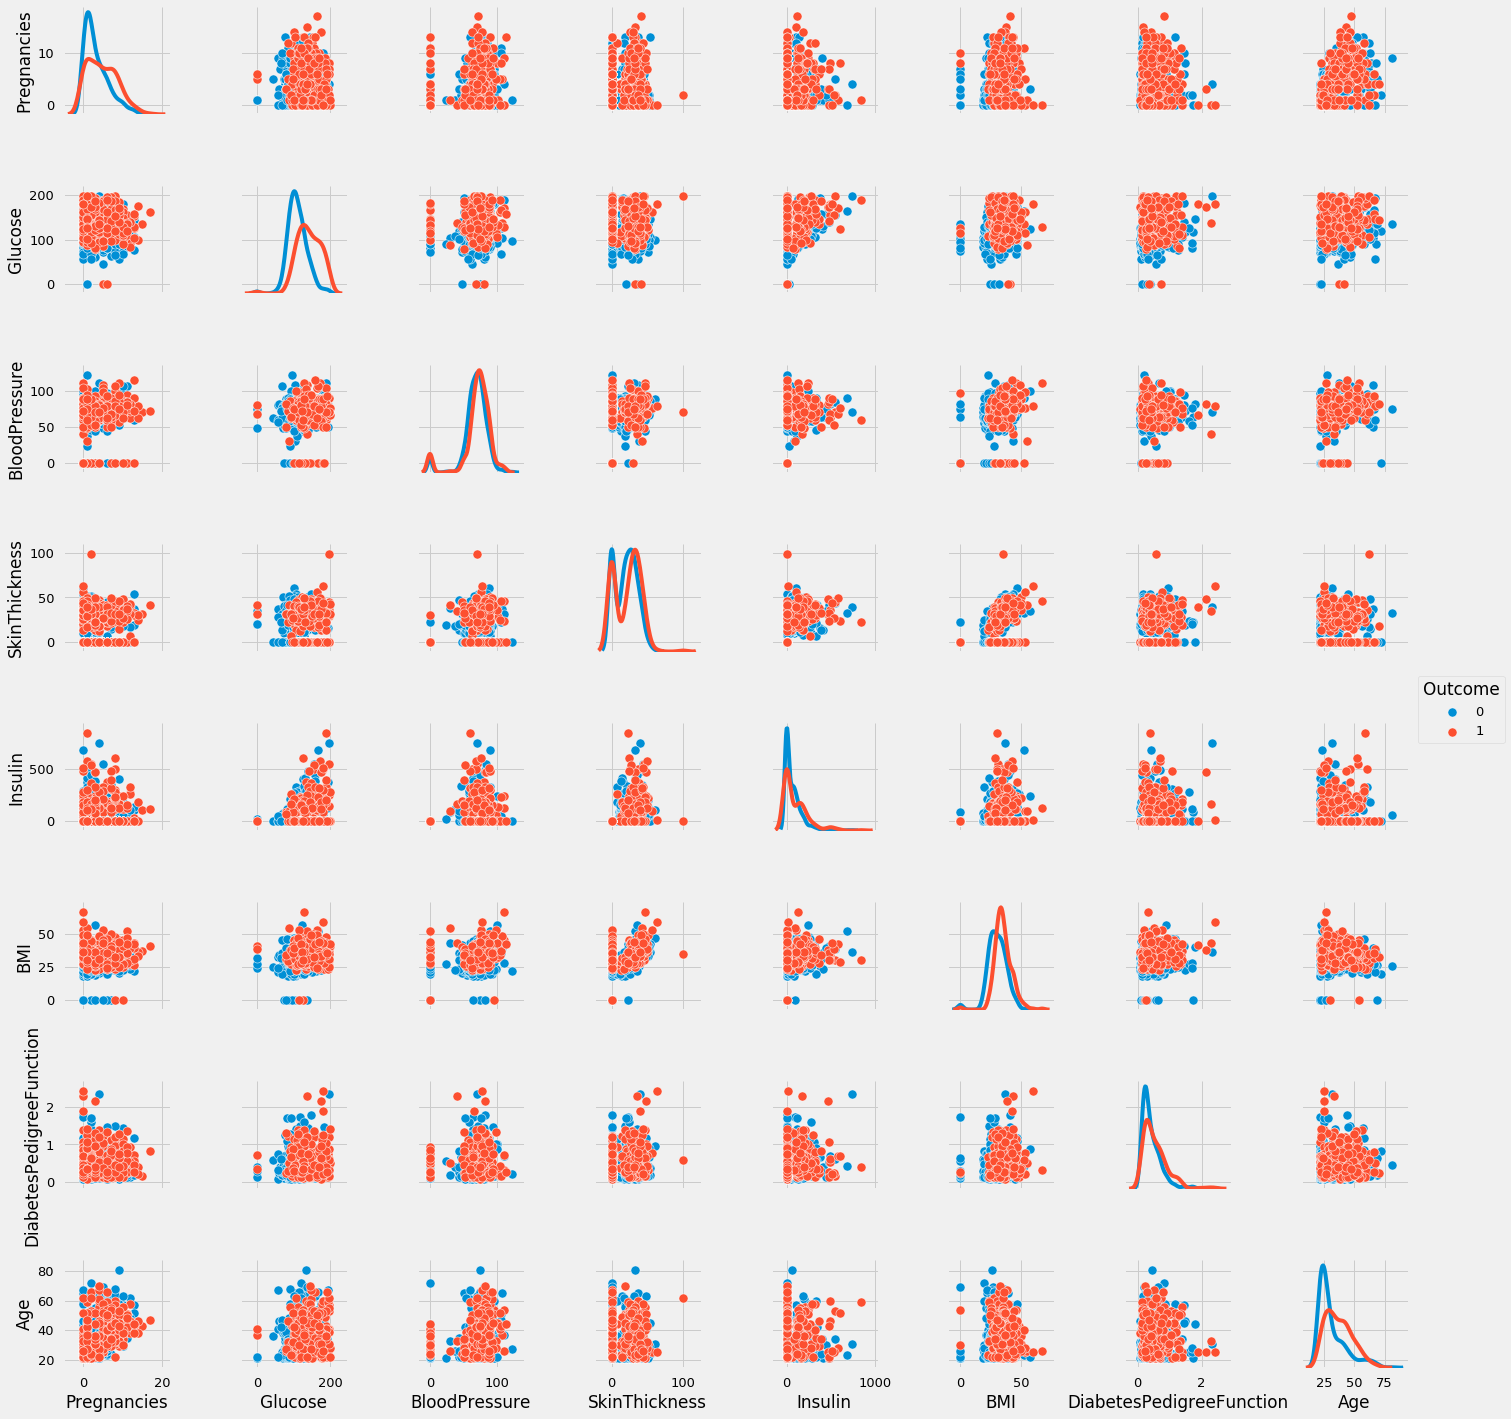

In [5]:
plt.style.use('fivethirtyeight')
sns.pairplot(df, hue = 'Outcome', vars = df.columns[:8], diag_kind = 'kde');

The only clear trend appears to be that a higher glucose is correlated with an outcome of 1, meaning the patient has diabetes. The age also appears as if it might be correlated with diabetes: younger patients appear to be at a lower risk for developing diabetes. 

### Impute Missing Values

Before we go any further, let's take care of those missing values. Again, there are zeros in the Glucose, BloodPressure, SkinThickness, Insulin, and BMI categories. None of these can actually be 0, so we will assume that the missing values are a lack of data. To fill in these missing values, we will replace them with the median value in the column. There are other, more complicated methods for filling in missing values, but in practice, median imputation generally performs well.

In [6]:
df['Glucose'] = df['Glucose'].replace({0: df['Glucose'].median()})
df['BloodPressure'] = df['BloodPressure'].replace({0: df['BloodPressure'].median()})
df['SkinThickness'] = df['SkinThickness'].replace({0: df['SkinThickness'].median()})
df['Insulin'] = df['Insulin'].replace({0: df['Insulin'].median()})
df['BMI'] = df['BMI'].replace({0: df['BMI'].median()})

In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,27.334635,94.652344,32.450911,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,9.229014,105.547598,6.875366,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,23.000000,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Now that there are no missing values, we can calculate correlation values to see how the features are related to the outcome. Correlation does not of course imply causation, but because we are building a linear model, the correlated features are likely useful for learning a mapping between the patient information and whether or not they have diabetes. In a problem with a greater number of features, we could use a correlation threshold for removing variables. In this case, we will probably want to keep all of the variables and let the model decide which are relevant. 

## Correlations

In [8]:
df.corr()['Outcome']

Pregnancies                 0.221898
Glucose                     0.492782
BloodPressure               0.165723
SkinThickness               0.189065
Insulin                     0.148457
BMI                         0.312249
DiabetesPedigreeFunction    0.173844
Age                         0.238356
Outcome                     1.000000
Name: Outcome, dtype: float64

Our initial interpretation of the plots was correct: the glucose is the highest correlated value with the outcome. None of the features are strongly correlated with the outcome and there are no negative correlations. TO show the correlations and the distributions, we can make another pairs plot, but this time use a custom function to map information onto the plot. We also change the lower triangle to show a 2-dimensional kernel density estimate rather than a repeat of the scatterplots.

C:\Users\willk\Anaconda3\lib\site-packages\matplotlib\contour.py:1000: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
C:\Users\willk\Anaconda3\lib\site-packages\matplotlib\contour.py:1000: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
C:\Users\willk\Anaconda3\lib\site-packages\matplotlib\contour.py:1000: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
C:\Users\willk\Anaconda3\lib\site-packages\matplotlib\contour.py:1000: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
C:\Users\willk\Anaconda3\lib\site-packages\matplotlib\contour.py:1000: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
C:\Users\willk\Anaconda3\lib\site-packages\matplotlib\contour.py:1000: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
C:\Users\willk\Anaconda3\lib\site-packages\matplotlib\contour.py:1000: UserWarning

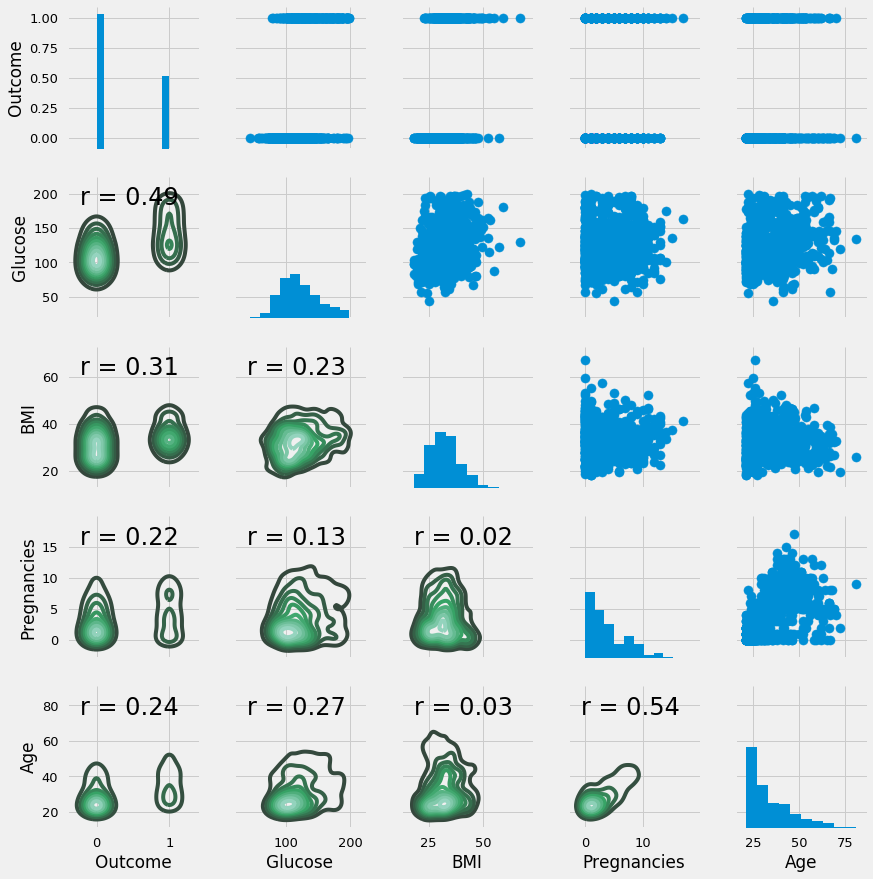

In [9]:
import scipy

# Function to calculate correlation coefficient between two variables
def corrfunc(x, y, **kwgs):
    r = np.corrcoef(x, y)[0][1]
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.1, .8), xycoords=ax.transAxes,
               size = 24)

# Create a PairGrid
g = sns.PairGrid(data = df,  
                 vars = ['Outcome', 'Glucose', 'BMI', 'Pregnancies', 'Age'])

# Map a scatterplot to the upper triangle
g.map_upper(plt.scatter)

# Map a histogram to the diagonal
g.map_diag(plt.hist)

# Map a kde plot to the lower triangle
g.map_lower(sns.kdeplot)

# Map the correlation coefficient to the lower diagonal
g.map_lower(corrfunc)

# Conclusions

In this brief Exploratory Data Analysis we learned 2 primary aspects about the dataset that we can use in modeling. First, we need to impute the missing values in several columns because these are not physically possible. We can use median imputation as a simple and effective method for filling in the 0 values. We also learned that there are correlations between the features and the response although there are not strong. Moreover, all of the features have at least a slight positive correlation with the outcome (whether or no the patient has diabetes). There are no obvious feature engineering steps to take, and there is no need to reduce the number of dimensions because there are only 8 features. Also, techniques such as [principal component analysis](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) obscure the physical relevance of the features and we cannot interpret the model as a result. Overall, I want to let the model learn from all of the data, and so will keep all of the features. This way we can let the data speak and interpret the modeling outcomes. This was a brief but valuable exercise and I'll see you in the modeling notebook!  


